In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Loading data

generation = pd.read_csv('Plant_1_Generation_Data.csv', index_col = 'DATE_TIME')
weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv',  index_col = 'DATE_TIME')

At first let's see the amount of produced energy over a given period of time. To this there is necesity to convert power to energy - in this case to divide it by 4. The amount of energy will be cumulated for days.

In [18]:
sumarised_generation = generation.groupby(['DATE_TIME'], sort = False).sum().reset_index()

In [22]:
sumarised_generation['ENERGY'] = sumarised_generation['AC_POWER']/4
sumarised_generation['DATE'] = pd.to_datetime(sumarised_generation['DATE_TIME']).dt.date

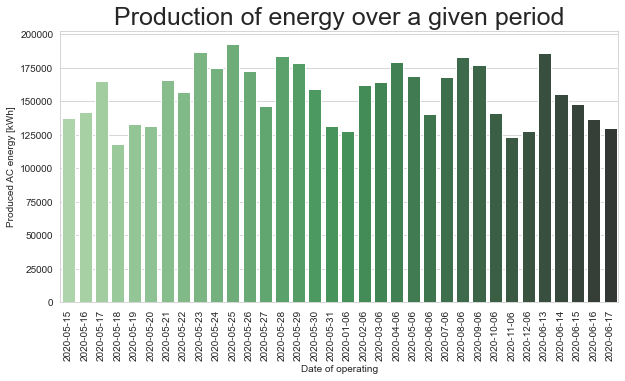

In [35]:
sns.set_style("whitegrid")

fig, total_production = plt.subplots(figsize=(10,5))
total_production = sns.barplot(x = "DATE", y = "ENERGY",
                              data = sumarised_generation,
                              estimator = sum,
                              ci = None,
                              palette = "Greens_d")

total_production.set(xlabel='Date of operating', ylabel='Produced AC energy [kWh]')
plt.title('Production of energy over a given period', fontsize=25)
plt.xticks(rotation=90)

plt.show()

On the picture above it is visible that everyday's amount of produced energy is diferent. In the next parts of this project I will try to discover reasons of that fact - dependencies of operating on weather conditions.
TO BE CONTINUED